In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')
print(dfx.shape, dfy.shape)

(576, 8) (576, 1)


In [3]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
X_train = dfx.values
Y_train = dfy.values

In [5]:
type(X_train)
type(Y_train)
Y_train.shape

(576, 1)

In [6]:
X_train.shape

(576, 8)

In [7]:
Y_train = Y_train.reshape((-1, ))#Converting in a 1D array

In [8]:
print(Y_train)

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

In [9]:
X_train

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

In [10]:
print(len(X_train), len(Y_train))

576 576


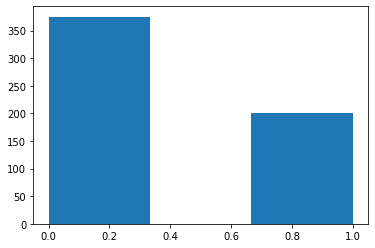

In [11]:
plt.hist(Y_train, 3)
plt.show()

In [12]:
#initializing query_points
df_test = pd.read_csv('Diabetes_Xtest.csv')
df_test = df_test.values
df_test

array([[0.00e+00, 1.80e+02, 9.00e+01, ..., 3.65e+01, 3.14e-01, 3.50e+01],
       [2.00e+00, 9.30e+01, 6.40e+01, ..., 3.80e+01, 6.74e-01, 2.30e+01],
       [2.00e+00, 1.14e+02, 6.80e+01, ..., 2.87e+01, 9.20e-02, 2.50e+01],
       ...,
       [0.00e+00, 1.62e+02, 7.60e+01, ..., 4.96e+01, 3.64e-01, 2.60e+01],
       [1.20e+01, 8.40e+01, 7.20e+01, ..., 2.97e+01, 2.97e-01, 4.60e+01],
       [0.00e+00, 9.40e+01, 0.00e+00, ..., 0.00e+00, 2.56e-01, 2.50e+01]])

In [13]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
    #return np.linalg.norm((x1-x2)) # -- same as above

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [14]:
with open("Diabetes_result.csv", "w") as f:
    f.write("Outcome\n")
    for element in df_test:
        pred = knn(X_train, Y_train, element, k=100)
        f.write(str(int(pred)) + '\n')
        print(int(pred))

0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
0
0
0
0
1
0
0


In [15]:
df_test.shape

(192, 8)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_sk = KNeighborsClassifier()

In [18]:
knn_sk.fit(X_train,Y_train)

KNeighborsClassifier()

In [21]:
knn_result = knn_sk.predict(df_test)

In [22]:
knn_result.shape

(192,)

In [23]:
knn_df = pd.DataFrame(knn_result, columns=["Outcome"])

In [24]:
knn_df.head(10)

,Outcome
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,1


In [25]:
knn_df.to_csv("Diabetes_result_2.csv", index=False)